In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
all_debt = pd.read_excel('../mf/all-debt-funds-2023.xlsx', skiprows=5, index_col=0)

In [12]:
all_debt

,Rating,Category,Expense Ratio (%),Launch,Net Assets (Cr),Fund Manager (Tenure),Fund Risk Grade,Fund Return Grade,Riskometer,Standard Deviation,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Funds,,,,,,,,,,,,,,,,,,,,,
360 ONE Dynamic Bond Fund - Direct Plan,4.0,DT-DB,0.27,2013-06-24,716.0,3.2,Average,Above Average,Moderately High,1.76,...,15.89,6.87,8.38,8.01,5.82,8.46,8.80,5.93,3.81,7.04
360 ONE Liquid Fund - Direct Plan,2.0,DT-LIQ,0.20,2013-11-13,814.0,3.2,NaN,Below Average,Low to Moderate,0.49,...,8.47,7.84,7.25,6.25,6.89,5.98,3.48,3.05,4.76,6.97
Aditya Birla Sun Life Active Debt Multi-Manager FoF Scheme - Direct Plan,4.0,DT-DB,0.27,2013-01-01,13.0,3.1,Below Average,Average,Moderate,9.28,...,14.14,5.81,15.29,3.04,6.80,8.80,9.62,4.98,3.48,7.17
Aditya Birla Sun Life Banking & PSU Debt Fund - Direct Plan,4.0,DT-BK & PSU,0.38,2013-01-01,10060.0,3.1,Below Average,Above Average,Moderate,0.93,...,12.77,8.85,12.67,5.95,6.90,10.23,11.28,3.94,4.01,7.27
Aditya Birla Sun Life Corporate Bond Fund - Direct Plan,4.0,DT-CB,0.33,2013-01-01,21135.0,7.1,Average,Above Average,Moderate,1.10,...,11.00,9.00,10.35,6.64,7.09,9.73,12.06,4.20,4.25,7.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UTI Short Duration Fund - Direct Plan,5.0,DT-SD,0.37,2013-01-01,2689.0,11.3,Low,High,Moderate,2.58,...,11.35,8.87,10.63,6.58,6.52,-3.50,10.97,9.04,4.41,7.59
UTI Ultra Short Duration Fund - Direct,5.0,DT-USD,0.43,2013-01-01,2093.0,8.9,Average,High,Moderate,1.49,...,9.44,9.11,9.46,7.32,7.61,3.85,5.83,6.68,4.79,7.29
WhiteOak Capital Liquid Fund - Direct Plan,2.0,DT-LIQ,0.26,2019-01-16,247.0,5.3,NaN,Below Average,Low to Moderate,0.53,...,NaN,NaN,NaN,NaN,NaN,NaN,3.69,3.01,4.56,6.96


In [13]:
all_debt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 481 entries, 360 ONE Dynamic Bond Fund - Direct Plan to Zerodha Nifty 1D Rate Liquid ETF
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rating                 300 non-null    float64       
 1   Category               481 non-null    object        
 2   Expense Ratio (%)      450 non-null    float64       
 3   Launch                 455 non-null    datetime64[ns]
 4   Net Assets (Cr)        470 non-null    float64       
 5   Fund Manager (Tenure)  481 non-null    float64       
 6   Fund Risk Grade        212 non-null    object        
 7   Fund Return Grade      300 non-null    object        
 8   Riskometer             481 non-null    object        
 9   Standard Deviation     307 non-null    float64       
 10  Sharpe Ratio           307 non-null    float64       
 11  Sortino Ratio          306 non-null    float64       
 12  Be

# Data Exploration

Convert return strings to numeric values

In [5]:
all_debt['Rating'] = all_debt['Rating'].apply(pd.to_numeric, errors='coerce')

In [6]:
all_debt.iloc[:, 2:3] = all_debt.iloc[:, 2:3].apply(pd.to_numeric, errors='coerce')

In [7]:
all_debt.iloc[:, 4:6] = all_debt.iloc[:, 4:6].apply(pd.to_numeric, errors='coerce')

In [8]:
all_debt.iloc[:, 9:] = all_debt.iloc[:, 9:].apply(pd.to_numeric, errors='coerce')

In [14]:
all_debt

,Rating,Category,Expense Ratio (%),Launch,Net Assets (Cr),Fund Manager (Tenure),Fund Risk Grade,Fund Return Grade,Riskometer,Standard Deviation,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Funds,,,,,,,,,,,,,,,,,,,,,
360 ONE Dynamic Bond Fund - Direct Plan,4.0,DT-DB,0.27,2013-06-24,716.0,3.2,Average,Above Average,Moderately High,1.76,...,15.89,6.87,8.38,8.01,5.82,8.46,8.80,5.93,3.81,7.04
360 ONE Liquid Fund - Direct Plan,2.0,DT-LIQ,0.20,2013-11-13,814.0,3.2,NaN,Below Average,Low to Moderate,0.49,...,8.47,7.84,7.25,6.25,6.89,5.98,3.48,3.05,4.76,6.97
Aditya Birla Sun Life Active Debt Multi-Manager FoF Scheme - Direct Plan,4.0,DT-DB,0.27,2013-01-01,13.0,3.1,Below Average,Average,Moderate,9.28,...,14.14,5.81,15.29,3.04,6.80,8.80,9.62,4.98,3.48,7.17
Aditya Birla Sun Life Banking & PSU Debt Fund - Direct Plan,4.0,DT-BK & PSU,0.38,2013-01-01,10060.0,3.1,Below Average,Above Average,Moderate,0.93,...,12.77,8.85,12.67,5.95,6.90,10.23,11.28,3.94,4.01,7.27
Aditya Birla Sun Life Corporate Bond Fund - Direct Plan,4.0,DT-CB,0.33,2013-01-01,21135.0,7.1,Average,Above Average,Moderate,1.10,...,11.00,9.00,10.35,6.64,7.09,9.73,12.06,4.20,4.25,7.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UTI Short Duration Fund - Direct Plan,5.0,DT-SD,0.37,2013-01-01,2689.0,11.3,Low,High,Moderate,2.58,...,11.35,8.87,10.63,6.58,6.52,-3.50,10.97,9.04,4.41,7.59
UTI Ultra Short Duration Fund - Direct,5.0,DT-USD,0.43,2013-01-01,2093.0,8.9,Average,High,Moderate,1.49,...,9.44,9.11,9.46,7.32,7.61,3.85,5.83,6.68,4.79,7.29
WhiteOak Capital Liquid Fund - Direct Plan,2.0,DT-LIQ,0.26,2019-01-16,247.0,5.3,NaN,Below Average,Low to Moderate,0.53,...,NaN,NaN,NaN,NaN,NaN,NaN,3.69,3.01,4.56,6.96


In [15]:
all_debt.describe()

,Rating,Expense Ratio (%),Launch,Net Assets (Cr),Fund Manager (Tenure),Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,300.000000,450.000000,455,470.000000,481.000000,307.000000,307.000000,306.000000,307.000000,307.000000,...,194.000000,208.000000,216.000000,220.000000,224.000000,244.000000,286.000000,305.000000,324.000000,392.000000
mean,3.000000,0.306489,2017-07-13 03:41:32.307692288,3183.648936,4.106445,1.645928,0.224007,0.681601,1.103779,2.242280,...,11.811186,8.210288,10.910880,5.990455,6.747589,7.725697,6.865664,5.199639,4.552963,7.301301
min,1.000000,0.000000,2003-07-08 00:00:00,0.000000,0.000000,0.400000,-2.200000,-4.920000,-11.060000,-1.820000,...,6.960000,5.100000,5.830000,0.280000,-7.710000,-45.090000,-44.270000,-16.250000,0.330000,5.610000
25%,2.000000,0.170000,2013-01-01 00:00:00,128.250000,1.400000,0.540000,-0.150000,-0.220000,0.785000,0.600000,...,9.262500,7.340000,8.375000,5.300000,6.185000,6.657500,4.362500,3.200000,3.230000,7.000000
50%,3.000000,0.240000,2018-05-25 00:00:00,581.500000,3.000000,1.040000,0.190000,0.310000,1.010000,2.180000,...,10.650000,8.450000,10.190000,6.640000,7.105000,8.720000,8.355000,3.650000,4.345000,7.205000
75%,4.000000,0.380000,2022-03-29 12:00:00,3162.250000,6.000000,1.880000,0.540000,1.190000,1.365000,3.300000,...,14.117500,8.900000,12.837500,7.042500,7.560000,10.435000,10.915000,4.260000,4.800000,7.510000
max,5.000000,1.430000,2024-03-28 00:00:00,52945.000000,11.500000,70.730000,1.660000,35.630000,4.330000,20.980000,...,21.650000,11.550000,18.890000,9.790000,11.770000,14.300000,26.910000,185.810000,143.820000,16.570000
std,1.115413,0.222696,NaN,6038.965827,3.374910,4.192350,0.477591,2.408822,1.016523,2.244893,...,3.213432,1.184484,3.076857,1.852037,1.758497,5.377350,7.381663,15.321262,8.073973,0.719414


In [18]:
all_debt['Category'].unique()

array(['DT-DB', 'DT-LIQ', 'DT-BK & PSU', 'DT-CB', 'DT-CR', 'DT-TM',
       'DT-OVERNHT', 'DT-Floater', 'DT-GL', 'DT-M to LD', 'DT-LONG D',
       'DT-LD', 'DT-MD', 'DT-MM', 'DT-USD', 'DT-SD', 'DT-OTH',
       'DT-Gilt 10Y CD'], dtype=object)

In [19]:
labels = ['DT-OVERNHT', 'DT-LIQ', 'DT-USD', 'DT-LD', 'DT-MM', 'DT-SD', 'DT-MD', 'DT-M to LD', 'DT-LONG D',
          'DT-DB', 'DT-CB', 'DT-CR', 'DT-BK & PSU', 'DT-GL', 'DT-Gilt 10Y CD', 'DT-Floater']

In [20]:
all_debt.isnull().sum()

Rating                   181
Category                   0
Expense Ratio (%)         31
Launch                    26
Net Assets (Cr)           11
Fund Manager (Tenure)      0
Fund Risk Grade          269
Fund Return Grade        181
Riskometer                 0
Standard Deviation       174
Sharpe Ratio             174
Sortino Ratio            175
Beta                     174
Alpha                    174
R-Squared                174
2014                     287
2015                     273
2016                     265
2017                     261
2018                     257
2019                     237
2020                     195
2021                     176
2022                     157
2023                      89
dtype: int64

In [21]:
all_debt.groupby('Category').count()

,Rating,Expense Ratio (%),Launch,Net Assets (Cr),Fund Manager (Tenure),Fund Risk Grade,Fund Return Grade,Riskometer,Standard Deviation,Sharpe Ratio,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Category,,,,,,,,,,,,,,,,,,,,,
DT-BK & PSU,22,23,23,23,23,22,22,23,21,21,...,12,15,16,16,16,16,17,20,21,22
DT-CB,21,22,22,23,23,21,21,23,20,20,...,11,12,12,13,14,17,20,20,21,21
DT-CR,14,14,15,20,24,14,14,24,14,14,...,7,10,13,13,14,14,16,16,14,14
DT-DB,24,25,26,28,29,24,24,29,23,23,...,18,18,19,19,20,22,23,24,24,25
DT-Floater,12,13,13,13,13,12,12,13,10,10,...,5,5,5,5,5,6,7,8,12,12
DT-GL,22,30,30,30,30,22,22,30,24,24,...,19,21,21,22,22,22,22,23,25,28
DT-Gilt 10Y CD,0,8,8,8,8,0,0,8,5,5,...,2,4,4,5,5,5,5,5,5,7
DT-LD,20,20,21,22,24,20,20,24,20,20,...,18,18,19,19,20,20,21,21,20,20
DT-LIQ,35,45,45,45,45,0,35,45,38,38,...,30,30,30,31,31,35,37,37,38,38


In [22]:
pd.crosstab(all_debt['Fund Return Grade'], all_debt['Fund Risk Grade'])

Fund Risk Grade,Above Average,Average,Below Average,High,Low
Fund Return Grade,,,,,
Above Average,10,20,11,3,5
Average,16,26,23,6,1
Below Average,19,14,4,8,4
High,2,5,8,0,5
Low,6,6,2,4,4


<Axes: xlabel='Fund Return Grade', ylabel='Fund Risk Grade'>

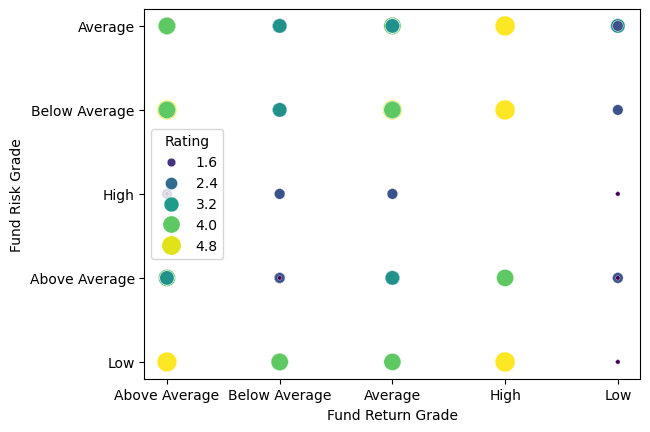

In [23]:
sns.scatterplot(data=all_debt, x='Fund Return Grade', y='Fund Risk Grade', hue='Rating', size='Rating', 
                sizes=(10, 200), palette='viridis', legend='brief')

In [24]:
num_columns = all_debt.select_dtypes('number').columns.to_list()

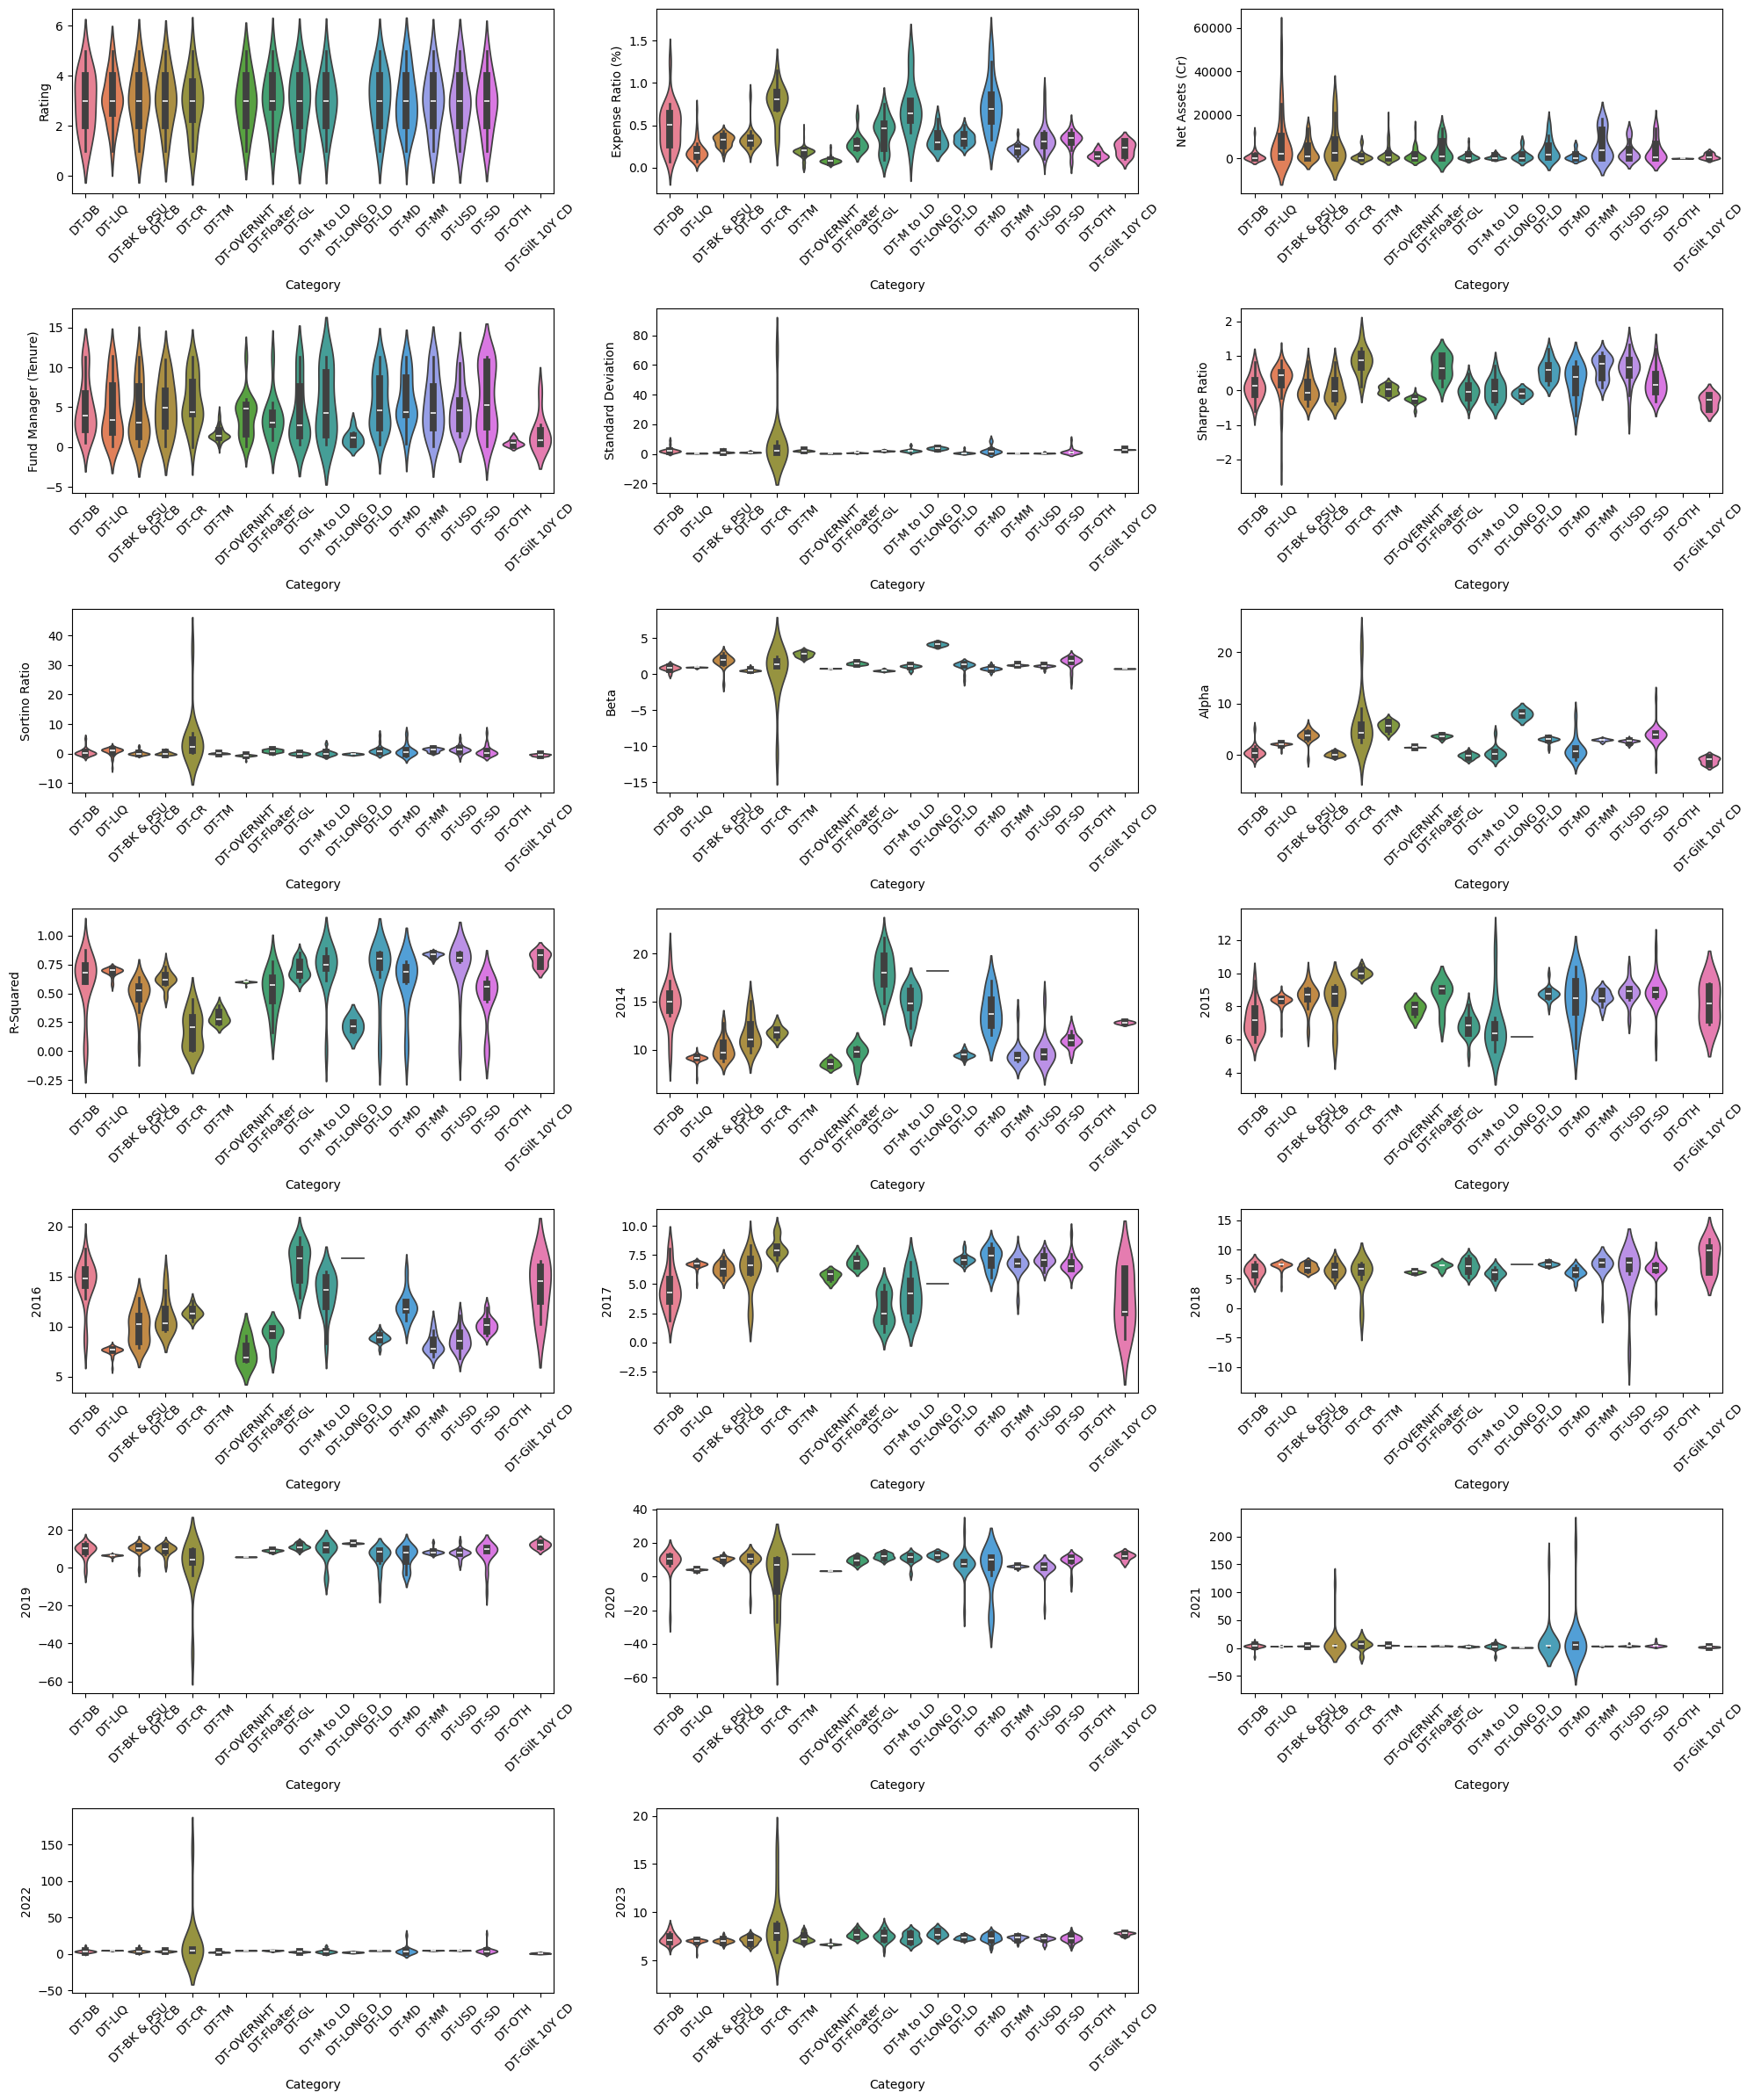

In [26]:
plt.figure(figsize=(20,24))
for i, col in enumerate(num_columns):
    plt.subplot(7, 3, i+1)
    sns.violinplot(data=all_debt, x='Category', y=all_debt.loc[:, num_columns[i]], hue='Category')
    plt.xticks(rotation=45)
plt.tight_layout()

In [27]:
all_debt.groupby('Category').mean(numeric_only=True).sort_values(by=2023)

,Rating,Expense Ratio (%),Net Assets (Cr),Fund Manager (Tenure),Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Category,,,,,,,,,,,,,,,,,,,,
DT-OVERNHT,3.000000,0.081667,1711.388889,3.902778,0.428148,-0.266667,-0.713704,0.803333,1.490000,0.598519,8.540000,7.830000,7.506667,5.703333,6.120000,5.701667,3.418800,3.192593,4.693704,6.690625
DT-LIQ,3.085714,0.200667,8460.822222,4.675556,0.479211,0.242368,0.708684,0.959474,2.036842,0.685000,9.079333,8.326333,7.585667,6.645161,7.212903,6.432286,4.043514,3.287027,4.823158,6.978684
DT-BK & PSU,2.954545,0.314783,3517.086957,4.134783,1.303810,0.029048,0.136667,1.853810,3.746190,0.481429,10.125833,8.560000,10.010000,6.309375,6.960625,10.073125,10.519412,3.827000,3.711905,7.042273
DT-CB,3.047619,0.338636,6408.565217,5.004348,1.210500,0.028500,0.065000,0.587000,0.136000,0.623500,11.672727,8.305000,11.087500,6.069231,6.587857,9.381765,9.516000,9.518000,3.459048,7.117619
DT-USD,2.958333,0.351250,3342.640000,4.896000,0.623478,0.610435,1.347391,1.097826,2.617826,0.722174,9.925385,8.821538,8.671538,7.082308,5.993846,7.716471,4.623182,4.105217,4.800833,7.212083
DT-DB,2.958333,0.477200,1139.571429,4.965517,2.481739,0.104348,0.399565,0.845217,0.616087,0.599565,14.852778,7.216111,14.387895,4.537368,6.287500,8.898182,8.904783,3.420000,3.770000,7.289200
DT-SD,2.916667,0.326923,3818.807692,6.148148,1.835217,0.239565,0.847273,1.667391,3.996087,0.456957,11.011500,8.887500,10.231000,6.783000,6.741500,7.211429,9.187727,4.981364,4.793750,7.293200
DT-TM,NaN,0.175612,2079.887755,1.671717,2.148182,0.020000,0.038182,2.772727,5.619091,0.295455,NaN,NaN,NaN,NaN,NaN,NaN,13.150000,4.808571,2.553889,7.330588
DT-MM,2.954545,0.217826,6473.434783,5.260870,0.583889,0.655556,1.191111,1.284444,2.943333,0.831111,9.522857,8.542857,8.262857,6.626429,7.089286,8.466000,6.093529,3.760000,4.742500,7.337273


In [31]:
df = all_debt.groupby('Category').mean(numeric_only=True).loc[labels].transpose().iloc[10:, :]

In [32]:
df

Category,DT-OVERNHT,DT-LIQ,DT-USD,DT-LD,DT-MM,DT-SD,DT-MD,DT-M to LD,DT-LONG D,DT-DB,DT-CB,DT-CR,DT-BK & PSU,DT-GL,DT-Gilt 10Y CD,DT-Floater
2014,8.540000,9.079333,9.925385,9.465556,9.522857,11.011500,13.967500,14.902308,18.200,14.852778,11.672727,11.837143,10.125833,18.076316,12.835000,9.500000
2015,7.830000,8.326333,8.821538,8.764444,8.542857,8.887500,8.380909,6.813846,6.130,7.216111,8.305000,10.033000,8.560000,6.826667,8.180000,8.682000
2016,7.506667,7.585667,8.671538,8.895263,8.262857,10.231000,12.073846,13.370769,16.790,14.387895,11.087500,11.414615,10.010000,16.233810,13.950000,9.074000
2017,5.703333,6.645161,7.082308,7.154211,6.626429,6.783000,7.190769,4.060769,5.030,4.537368,6.069231,8.159231,6.309375,2.812727,3.668000,6.942000
2018,6.120000,7.212903,5.993846,7.514000,7.089286,6.741500,6.072308,5.893077,7.460,6.287500,6.587857,5.596429,6.960625,7.113182,8.808000,7.196000
2019,5.701667,6.432286,7.716471,5.559500,8.466000,7.211429,5.820000,8.363846,12.915,8.898182,9.381765,1.172857,10.073125,11.265000,12.064000,8.953333
2020,3.418800,4.043514,4.623182,7.288095,6.093529,9.187727,3.259375,10.746154,12.690,8.904783,9.516000,-1.769375,10.519412,12.051364,11.956000,9.582857
2021,3.192593,3.287027,4.105217,11.701905,3.760000,4.981364,13.391667,2.227857,1.060,3.420000,9.518000,5.918125,3.827000,2.881739,1.922000,4.132500
2022,4.693704,4.823158,4.800833,4.596000,4.742500,4.793750,4.631875,3.436154,2.310,3.770000,3.459048,14.998571,3.711905,2.763200,0.912000,4.504167
2023,6.690625,6.978684,7.212083,7.368000,7.337273,7.293200,7.365625,7.373077,7.788,7.289200,7.117619,8.665714,7.042273,7.578929,7.782857,7.738333


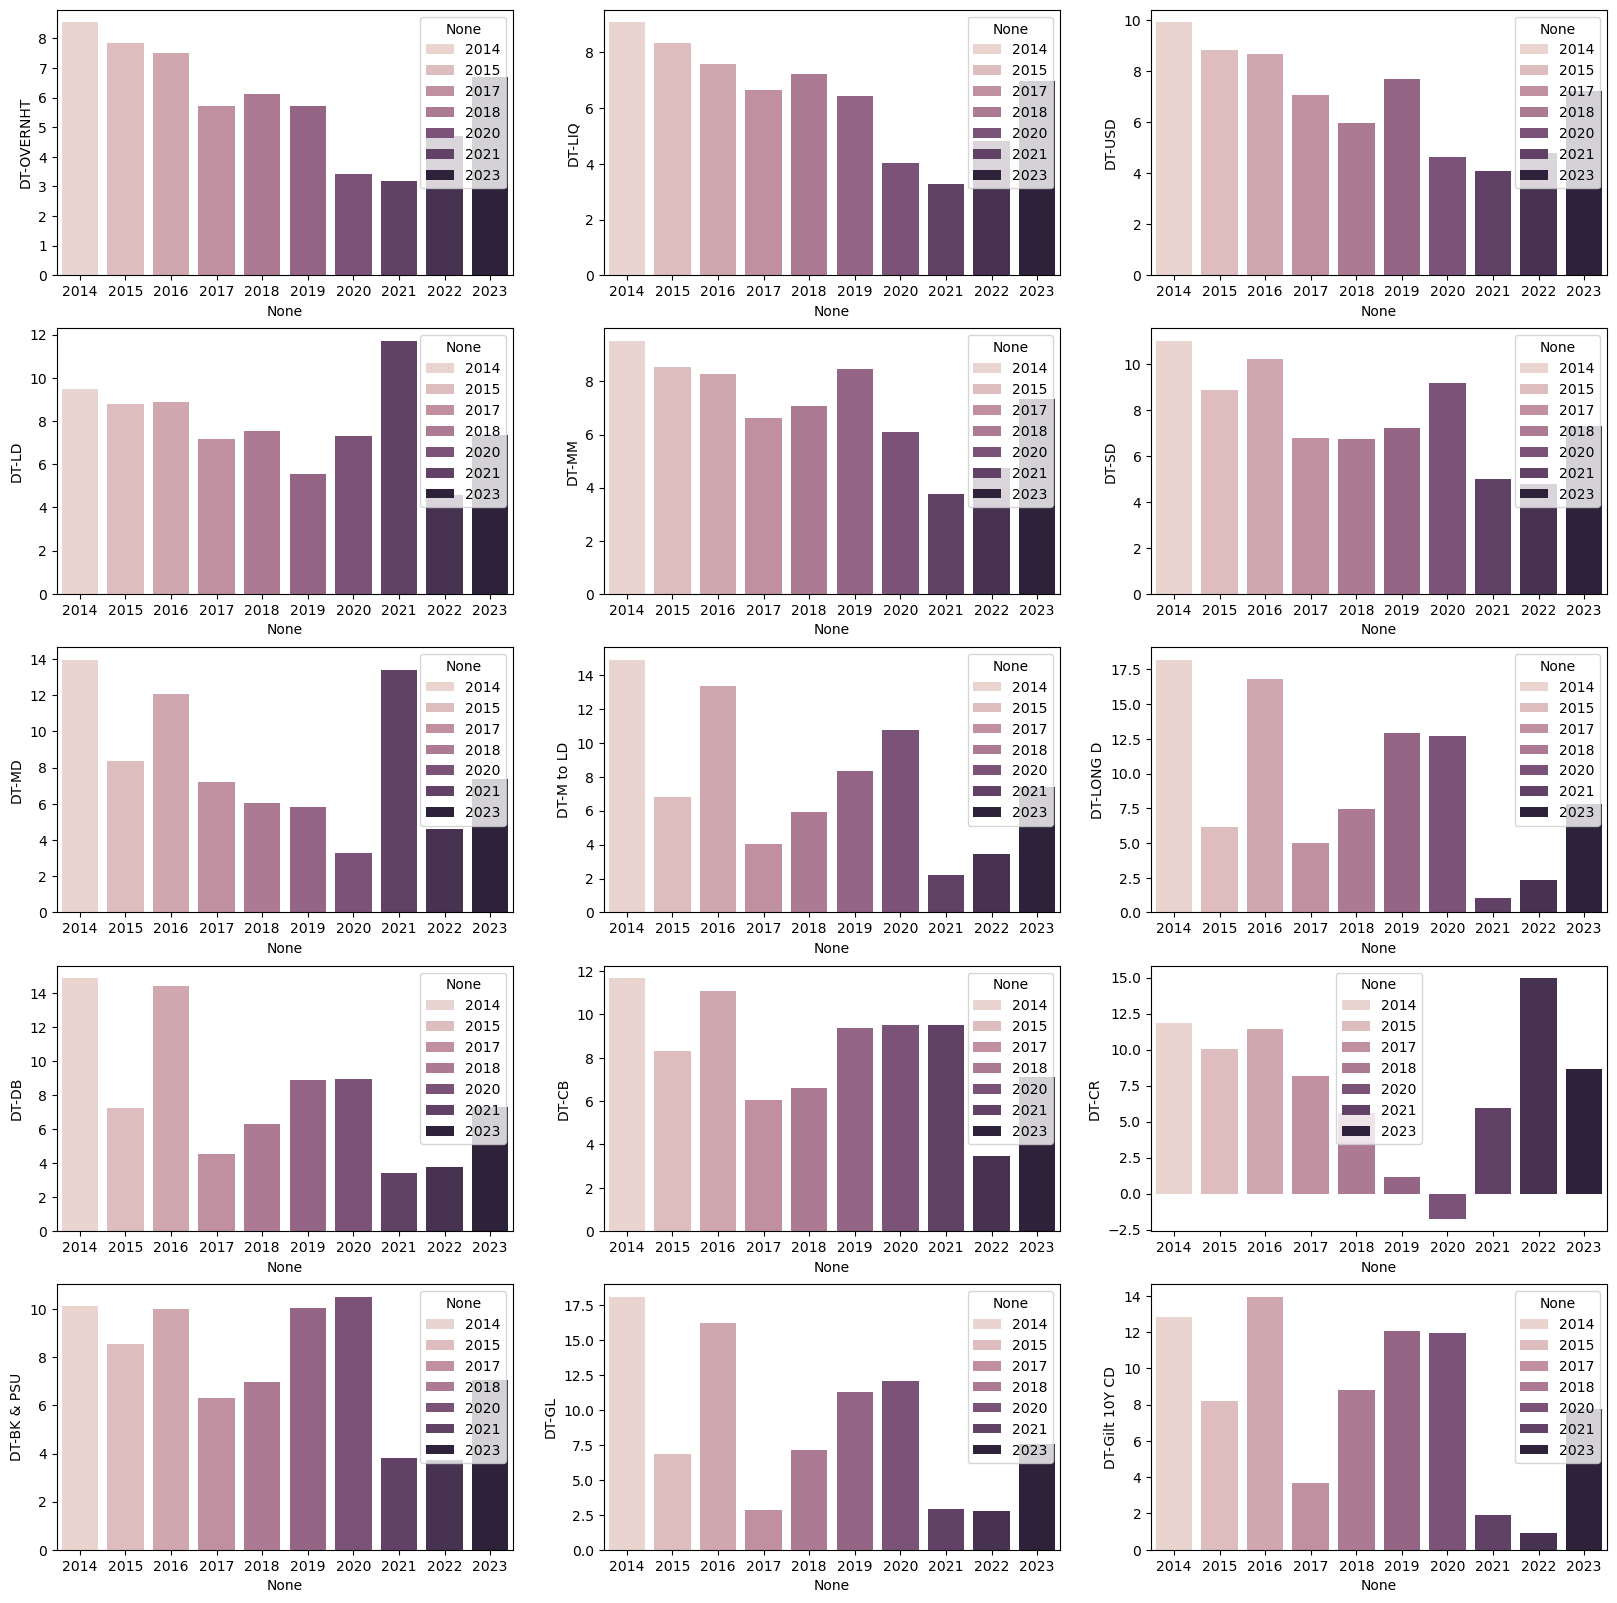

In [33]:
fig, axes = plt.subplots(5,3,figsize=(20,20))
for i, ax in enumerate(axes.ravel()):
    sns.barplot(data=df, x=df.index, y=df.iloc[:, i], hue=df.index, ax=ax)

In [35]:
all_debt.groupby('Category').std(numeric_only=True).sort_values(by=2023)

,Rating,Expense Ratio (%),Net Assets (Cr),Fund Manager (Tenure),Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Category,,,,,,,,,,,,,,,,,,,,
DT-OVERNHT,1.125463,0.035335,2980.719226,2.606309,0.005573,0.117375,0.413262,0.013009,0.069226,0.008640,0.370000,0.410731,1.398904,0.377403,0.185203,0.027869,0.080484,0.035582,0.049780,0.111121
DT-Gilt 10Y CD,NaN,0.084515,1173.387031,2.287232,0.114543,0.213190,0.309273,0.011402,0.680515,0.062610,0.148492,1.277941,2.834655,2.708389,2.590786,1.753120,2.028344,0.920038,0.597302,0.157556
DT-LD,1.165287,0.075566,4885.565753,3.420630,0.862088,0.299454,1.450823,0.594028,0.557929,0.262217,0.334334,0.381841,0.433594,0.403985,0.285830,5.735533,7.746147,32.520284,0.207375,0.183951
DT-MM,1.174218,0.055837,7136.475224,3.577803,0.050192,0.323823,0.611516,0.111050,0.238525,0.021113,1.257821,0.406986,0.949732,0.976561,2.071887,1.432614,0.657257,0.226222,0.278641,0.224948
DT-BK & PSU,1.174218,0.071279,4496.692592,3.564804,0.581193,0.348309,0.657140,0.874617,1.242242,0.142172,1.099748,0.742890,1.660614,0.550399,0.630010,3.048485,1.273295,0.529708,1.800763,0.240316
DT-USD,1.197068,0.166663,4320.949007,2.986843,0.279783,0.464068,1.285274,0.199407,0.344897,0.240756,1.656118,0.666656,1.087343,0.557840,4.437885,2.463021,5.380773,1.215240,0.253496,0.270940
DT-LIQ,1.010865,0.116529,12822.404154,3.604237,0.026750,0.544796,1.319251,0.064219,0.331125,0.038397,0.447097,0.381788,0.420227,0.344740,0.788540,0.599961,0.526926,0.282684,0.228084,0.281638
DT-SD,1.138904,0.101144,5202.571326,4.052954,2.021977,0.399403,1.748965,0.829514,1.980424,0.218267,0.773803,1.012505,0.795632,0.792186,1.626689,6.134593,3.954902,2.929696,4.859540,0.365704
DT-Floater,1.083625,0.108858,4993.029114,2.792412,0.209592,0.338298,0.480677,0.166520,0.341214,0.179323,0.983082,0.866729,1.143910,0.489255,0.542245,0.563087,1.794805,0.336144,0.547016,0.367568


In [36]:
iqr = all_debt[num_columns + ['Category']].groupby('Category').quantile(.75) - \
      all_debt[num_columns + ['Category']].groupby('Category').quantile(.25)
iqr.sort_values(by=2022)

,Rating,Expense Ratio (%),Net Assets (Cr),Fund Manager (Tenure),Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Category,,,,,,,,,,,,,,,,,,,,
DT-OVERNHT,2.00,0.0325,1605.25,3.550,0.0000,0.0850,0.2300,0.0100,0.0400,0.0000,0.3650,0.395,1.3100,0.3450,0.1750,0.0225,0.0700,0.0500,0.0400,0.0525
DT-LIQ,1.50,0.0800,9916.00,5.900,0.0100,0.3350,0.9300,0.0375,0.2325,0.0300,0.0900,0.115,0.0775,0.1100,0.1050,0.3050,0.6500,0.1400,0.1175,0.1575
DT-LD,2.00,0.1025,5488.25,6.175,0.0700,0.3850,0.5675,0.1050,0.3075,0.1025,0.3275,0.300,0.4550,0.3150,0.3775,4.1600,1.3900,0.5500,0.2075,0.2900
DT-USD,2.00,0.1250,3815.00,3.500,0.0300,0.4300,0.7500,0.1100,0.3300,0.0300,0.5000,0.390,1.3700,0.5400,1.2700,0.5900,0.9475,0.4550,0.2850,0.1900
DT-MM,2.00,0.0550,12900.00,5.200,0.0375,0.5600,0.9725,0.1075,0.1425,0.0325,0.3250,0.490,0.9750,0.2200,0.3225,0.2850,0.4900,0.2225,0.3825,0.3175
DT-LONG D,NaN,0.1500,1515.00,1.100,0.6100,0.0850,0.1550,0.1700,0.6150,0.0550,0.0000,0.000,0.0000,0.0000,0.0000,0.1650,1.1100,0.0500,0.4500,0.4200
DT-SD,2.00,0.0850,6334.25,8.200,0.1950,0.5100,0.7075,0.2650,0.3400,0.1150,0.5950,0.250,0.9775,0.5325,0.5925,1.3800,1.3650,1.0200,0.5775,0.4700
DT-Floater,1.25,0.0800,7677.00,1.500,0.2725,0.5800,0.7475,0.2500,0.3550,0.1950,0.5300,0.170,0.7100,0.5800,0.0800,0.6000,2.2900,0.5050,0.7525,0.4550
DT-TM,NaN,0.0400,1991.50,0.900,0.5500,0.2100,0.2450,0.4800,1.3000,0.0800,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.3700,0.8100,0.5150


# Analysis of one Category type

In [37]:
all_debt['Category'].unique()

array(['DT-DB', 'DT-LIQ', 'DT-BK & PSU', 'DT-CB', 'DT-CR', 'DT-TM',
       'DT-OVERNHT', 'DT-Floater', 'DT-GL', 'DT-M to LD', 'DT-LONG D',
       'DT-LD', 'DT-MD', 'DT-MM', 'DT-USD', 'DT-SD', 'DT-OTH',
       'DT-Gilt 10Y CD'], dtype=object)

In [38]:
one_debt = all_debt[all_debt['Category'] == 'DT-DB']

In [39]:
one_debt.iloc[:, 9:15]

,Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared
Funds,,,,,,
360 ONE Dynamic Bond Fund - Direct Plan,1.76,0.45,0.80,0.83,1.00,0.59
Aditya Birla Sun Life Active Debt Multi-Manager FoF Scheme - Direct Plan,9.28,0.07,0.08,-0.15,0.61,0.00
Aditya Birla Sun Life Dynamic Bond Fund - Direct Plan,2.39,0.54,1.30,0.87,1.52,0.36
Aditya Birla Sun Life Dynamic Bond Fund - Segregated Portfolio 1 - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN
Axis All Seasons Debt FoF - Direct Plan,1.47,0.17,0.25,0.76,0.45,0.71
Axis Dynamic Bond Fund - Direct Plan,2.35,-0.02,-0.03,1.28,0.28,0.80
Bandhan Dynamic Bond Fund - Direct Plan,2.76,-0.08,-0.10,1.38,0.14,0.67
Baroda BNP Paribas Dynamic Bond Fund - Direct Plan,1.94,0.19,0.28,1.11,0.65,0.88
Canara Robeco Dynamic Bond Fund - Direct Plan,1.77,-0.11,-0.20,0.94,0.04,0.76


<Axes: >

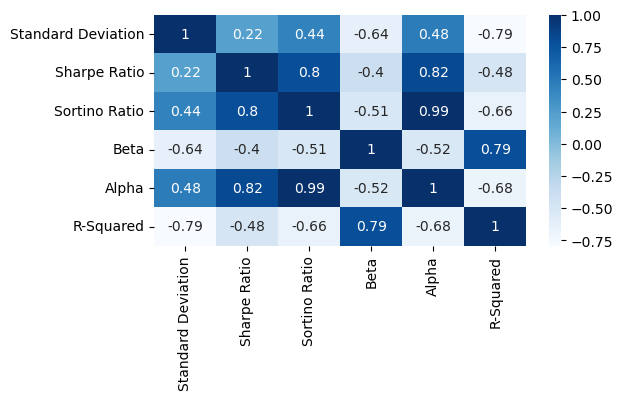

In [40]:
plt.figure(figsize=(6,3))
sns.heatmap(one_debt.iloc[:, 9:15].corr(), annot=True, cmap='Blues')

In [41]:
df = one_debt.iloc[:, -9:]
df

,2015,2016,2017,2018,2019,2020,2021,2022,2023
Funds,,,,,,,,,
360 ONE Dynamic Bond Fund - Direct Plan,6.87,8.38,8.01,5.82,8.46,8.80,5.93,3.81,7.04
Aditya Birla Sun Life Active Debt Multi-Manager FoF Scheme - Direct Plan,5.81,15.29,3.04,6.80,8.80,9.62,4.98,3.48,7.17
Aditya Birla Sun Life Dynamic Bond Fund - Direct Plan,8.25,14.82,2.74,6.19,-0.28,10.36,5.52,6.60,7.52
Aditya Birla Sun Life Dynamic Bond Fund - Segregated Portfolio 1 - Direct Plan,NaN,NaN,NaN,NaN,NaN,-24.63,NaN,NaN,NaN
Axis All Seasons Debt FoF - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,5.22,3.91,7.03
Axis Dynamic Bond Fund - Direct Plan,8.14,14.49,4.28,7.11,11.80,12.81,4.32,2.51,6.98
Bandhan Dynamic Bond Fund - Direct Plan,7.07,14.16,4.29,7.58,11.74,13.86,2.67,1.86,7.28
Baroda BNP Paribas Dynamic Bond Fund - Direct Plan,7.28,14.59,4.37,5.84,7.35,10.54,2.67,4.20,7.97
Canara Robeco Dynamic Bond Fund - Direct Plan,6.45,15.65,3.89,4.89,9.84,10.54,2.27,3.60,6.82


In [42]:
df.head()

,2015,2016,2017,2018,2019,2020,2021,2022,2023
Funds,,,,,,,,,
360 ONE Dynamic Bond Fund - Direct Plan,6.87,8.38,8.01,5.82,8.46,8.80,5.93,3.81,7.04
Aditya Birla Sun Life Active Debt Multi-Manager FoF Scheme - Direct Plan,5.81,15.29,3.04,6.80,8.80,9.62,4.98,3.48,7.17
Aditya Birla Sun Life Dynamic Bond Fund - Direct Plan,8.25,14.82,2.74,6.19,-0.28,10.36,5.52,6.60,7.52
Aditya Birla Sun Life Dynamic Bond Fund - Segregated Portfolio 1 - Direct Plan,NaN,NaN,NaN,NaN,NaN,-24.63,NaN,NaN,NaN
Axis All Seasons Debt FoF - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,5.22,3.91,7.03


In [43]:
df.shape

(29, 9)

In [44]:
df.describe()

,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,18.000000,19.000000,19.000000,20.00000,22.000000,23.000000,24.000000,24.000000,25.000000
mean,7.216111,14.387895,4.537368,6.28750,8.898182,8.904783,3.420000,3.770000,7.289200
std,0.950945,2.270312,1.705715,1.16271,4.074623,7.550800,4.540832,1.982482,0.555345
min,5.810000,8.380000,1.890000,4.11000,-3.220000,-24.630000,-15.630000,0.530000,6.250000
25%,6.435000,14.125000,3.560000,5.72250,8.452500,9.210000,2.950000,2.600000,6.980000
50%,7.150000,14.820000,4.290000,6.22000,10.200000,10.540000,3.495000,3.540000,7.130000
75%,7.865000,15.705000,5.420000,7.00500,11.397500,11.520000,5.012500,4.305000,7.520000
max,9.560000,17.760000,8.080000,7.94000,13.370000,13.860000,11.380000,10.780000,8.620000


number of mutual funds in each year

In [45]:
df.count()

2015    18
2016    19
2017    19
2018    20
2019    22
2020    23
2021    24
2022    24
2023    25
dtype: int64

number of years each mutual fund is operating

In [46]:
df.count(axis=1)

Funds
360 ONE Dynamic Bond Fund - Direct Plan                                           9
Aditya Birla Sun Life Active Debt Multi-Manager FoF Scheme - Direct Plan          9
Aditya Birla Sun Life Dynamic Bond Fund - Direct Plan                             9
Aditya Birla Sun Life Dynamic Bond Fund - Segregated Portfolio 1 - Direct Plan    1
Axis All Seasons Debt FoF - Direct Plan                                           3
Axis Dynamic Bond Fund - Direct Plan                                              9
Bandhan Dynamic Bond Fund - Direct Plan                                           9
Baroda BNP Paribas Dynamic Bond Fund - Direct Plan                                9
Canara Robeco Dynamic Bond Fund - Direct Plan                                     9
DSP Strategic Bond Fund - Direct Plan                                             9
Franklin India Dynamic Accrual Fund - Segregated Portfolio 2 - Direct Plan        0
Franklin India Dynamic Accrual Fund - Segregated Portfolio 3 - Direct 

average return of all funds by year

In [47]:
df.mean()

2015     7.216111
2016    14.387895
2017     4.537368
2018     6.287500
2019     8.898182
2020     8.904783
2021     3.420000
2022     3.770000
2023     7.289200
dtype: float64

percentage of funds having positive return by year

In [48]:
(df>0).sum() / df.count() * 100

2015    100.000000
2016    100.000000
2017    100.000000
2018    100.000000
2019     90.909091
2020     95.652174
2021     95.833333
2022    100.000000
2023    100.000000
dtype: float64

Select funds with minimum years of history and from recent years

In [49]:
dfd = df.iloc[:, :].dropna(thresh=3)
dfd.shape

(23, 9)

In [50]:
dfd.count(axis=1)

Funds
360 ONE Dynamic Bond Fund - Direct Plan                                     9
Aditya Birla Sun Life Active Debt Multi-Manager FoF Scheme - Direct Plan    9
Aditya Birla Sun Life Dynamic Bond Fund - Direct Plan                       9
Axis All Seasons Debt FoF - Direct Plan                                     3
Axis Dynamic Bond Fund - Direct Plan                                        9
Bandhan Dynamic Bond Fund - Direct Plan                                     9
Baroda BNP Paribas Dynamic Bond Fund - Direct Plan                          9
Canara Robeco Dynamic Bond Fund - Direct Plan                               9
DSP Strategic Bond Fund - Direct Plan                                       9
Groww Dynamic Bond Fund - Direct Plan                                       5
HDFC Dynamic Debt Fund - Direct Plan                                        9
HSBC Dynamic Bond Fund - Direct Plan                                        9
ICICI Prudential All Seasons Bond Fund - Direct Plan      

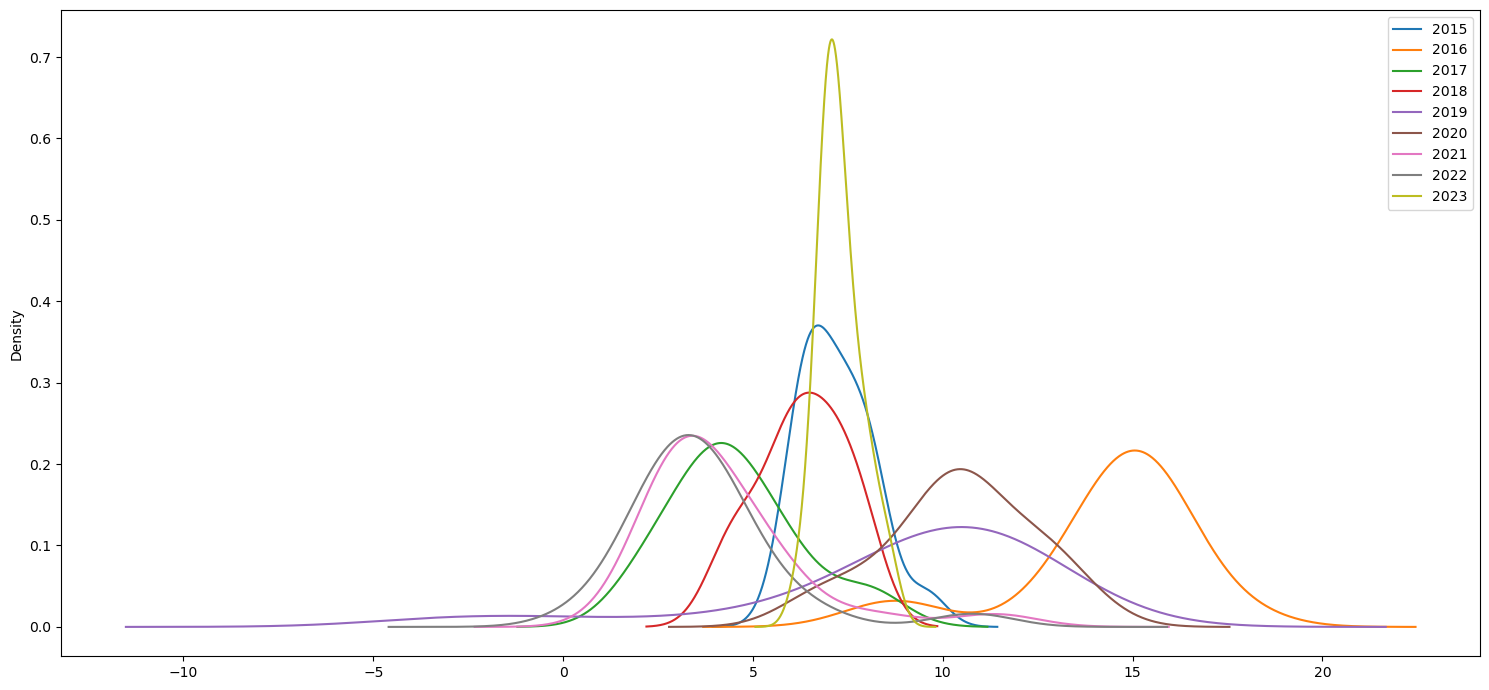

In [51]:
dfd.plot.kde(figsize=(15,7))
plt.tight_layout()
plt.show()

# CAGR

Cumulative Annual Growth Rate

In [52]:
def total_return(x):
    s = 1
    for i in x:
        if not np.isnan(i):
            s *= (1 + i/100)
    return s

In [53]:
cagr = (dfd.apply(lambda row : total_return(row), axis=1)**(1/dfd.count(axis=1)) - 1).sort_values(ascending=False)
cagr.name = 'cagr'

In [54]:
cagr.sort_values(ascending=False)

Funds
ICICI Prudential All Seasons Bond Fund - Direct Plan                        0.087258
Kotak Dynamic Bond Fund - Direct Plan                                       0.083357
SBI Dynamic Bond Fund - Direct Plan                                         0.080902
PGIM India Dynamic Bond Fund - Direct Plan                                  0.079852
Axis Dynamic Bond Fund - Direct Plan                                        0.079778
Bandhan Dynamic Bond Fund - Direct Plan                                     0.077485
Quantum Dynamic Bond Fund - Direct Plan                                     0.076147
HSBC Dynamic Bond Fund - Direct Plan                                        0.074937
DSP Strategic Bond Fund - Direct Plan                                       0.074364
UTI Dynamic Bond Fund - Direct Plan                                         0.072936
Aditya Birla Sun Life Active Debt Multi-Manager FoF Scheme - Direct Plan    0.071643
Baroda BNP Paribas Dynamic Bond Fund - Direct Plan         

# Ergodic Sum

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
values = dfd.to_numpy()

In [57]:
scaled = StandardScaler(with_mean=False, with_std=True).fit_transform(values)

In [58]:
scaled = np.round(scaled, 3)

In [59]:
scaled_dfd = pd.DataFrame(scaled, index=dfd.index, columns=dfd.columns)

In [60]:
scaled_dfd

,2015,2016,2017,2018,2019,2020,2021,2022,2023
Funds,,,,,,,,,
360 ONE Dynamic Bond Fund - Direct Plan,7.434,3.792,4.825,5.136,2.125,4.655,2.909,1.937,12.753
Aditya Birla Sun Life Active Debt Multi-Manager FoF Scheme - Direct Plan,6.287,6.919,1.831,6.000,2.211,5.089,2.443,1.769,12.988
Aditya Birla Sun Life Dynamic Bond Fund - Direct Plan,8.927,6.707,1.650,5.462,-0.070,5.480,2.708,3.355,13.622
Axis All Seasons Debt FoF - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,2.561,1.988,12.734
Axis Dynamic Bond Fund - Direct Plan,8.808,6.557,2.578,6.274,2.964,6.776,2.119,1.276,12.644
Bandhan Dynamic Bond Fund - Direct Plan,7.650,6.408,2.584,6.689,2.949,7.332,1.310,0.945,13.187
Baroda BNP Paribas Dynamic Bond Fund - Direct Plan,7.877,6.603,2.632,5.153,1.846,5.575,1.310,2.135,14.437
Canara Robeco Dynamic Bond Fund - Direct Plan,6.979,7.082,2.343,4.315,2.472,5.575,1.114,1.830,12.354
DSP Strategic Bond Fund - Direct Plan,7.823,6.064,1.313,6.106,2.758,6.903,1.482,1.144,15.615


In [61]:
(scaled_dfd>0).sum()/scaled_dfd.count()

2015    1.000000
2016    1.000000
2017    1.000000
2018    1.000000
2019    0.909091
2020    1.000000
2021    1.000000
2022    1.000000
2023    1.000000
dtype: float64

In [62]:
ergodic = (scaled_dfd[scaled_dfd>0].sum(axis=1).add(2*scaled_dfd[scaled_dfd<0].sum(axis=1))/dfd.count(axis=1)).sort_values(ascending=False)
ergodic.name = 'ergodic'
ergodic

Funds
ICICI Prudential All Seasons Bond Fund - Direct Plan                        6.034889
Kotak Dynamic Bond Fund - Direct Plan                                       5.859556
Axis All Seasons Debt FoF - Direct Plan                                     5.761000
PGIM India Dynamic Bond Fund - Direct Plan                                  5.637222
SBI Dynamic Bond Fund - Direct Plan                                         5.562333
Axis Dynamic Bond Fund - Direct Plan                                        5.555111
DSP Strategic Bond Fund - Direct Plan                                       5.467556
UTI Dynamic Bond Fund - Direct Plan                                         5.462222
Bandhan Dynamic Bond Fund - Direct Plan                                     5.450444
JM Dynamic Bond Fund - Direct Plan                                          5.381444
HSBC Dynamic Bond Fund - Direct Plan                                        5.328111
Aditya Birla Sun Life Dynamic Bond Fund - Direct Plan      

without standardizing

In [63]:
(dfd[dfd>0].sum(axis=1).add(2*dfd[dfd<0].sum(axis=1))/dfd.count(axis=1)).sort_values(ascending=False).head(10)

Funds
ICICI Prudential All Seasons Bond Fund - Direct Plan                        8.796667
Kotak Dynamic Bond Fund - Direct Plan                                       8.392222
SBI Dynamic Bond Fund - Direct Plan                                         8.170000
Axis Dynamic Bond Fund - Direct Plan                                        8.048889
PGIM India Dynamic Bond Fund - Direct Plan                                  8.040000
Bandhan Dynamic Bond Fund - Direct Plan                                     7.834444
Quantum Dynamic Bond Fund - Direct Plan                                     7.691250
HSBC Dynamic Bond Fund - Direct Plan                                        7.567778
DSP Strategic Bond Fund - Direct Plan                                       7.516667
Aditya Birla Sun Life Active Debt Multi-Manager FoF Scheme - Direct Plan    7.221111
dtype: float64

# Average Ranking

Ranking of each fund in each year - bigger number is better

In [64]:
dfdr = dfd.rank(axis=0, ascending = True)
dfdr

,2015,2016,2017,2018,2019,2020,2021,2022,2023
Funds,,,,,,,,,
360 ONE Dynamic Bond Fund - Direct Plan,8.0,1.0,18.0,6.0,7.0,5.0,21.0,15.0,9.0
Aditya Birla Sun Life Active Debt Multi-Manager FoF Scheme - Direct Plan,1.0,12.0,4.0,12.0,8.0,6.0,17.0,12.0,13.0
Aditya Birla Sun Life Dynamic Bond Fund - Direct Plan,17.0,10.0,3.0,10.0,2.0,10.0,20.0,22.0,18.0
Axis All Seasons Debt FoF - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,19.0,16.0,7.0
Axis Dynamic Bond Fund - Direct Plan,15.0,7.0,9.0,16.0,19.0,20.0,16.0,6.0,6.0
Bandhan Dynamic Bond Fund - Direct Plan,9.0,6.0,10.0,17.0,18.0,22.0,3.5,2.0,14.0
Baroda BNP Paribas Dynamic Bond Fund - Direct Plan,11.0,8.0,11.0,7.0,5.0,11.5,3.5,17.0,20.0
Canara Robeco Dynamic Bond Fund - Direct Plan,6.0,14.0,8.0,4.0,10.0,11.5,2.0,13.0,5.0
DSP Strategic Bond Fund - Direct Plan,10.0,4.0,2.0,13.0,15.0,21.0,6.5,4.0,23.0


Percentile ranking of funds

In [65]:
dfdr = dfdr/dfdr.count()*100
dfdr.head()

,2015,2016,2017,2018,2019,2020,2021,2022,2023
Funds,,,,,,,,,
360 ONE Dynamic Bond Fund - Direct Plan,44.444444,5.263158,94.736842,30.0,31.818182,22.727273,91.304348,65.217391,39.130435
Aditya Birla Sun Life Active Debt Multi-Manager FoF Scheme - Direct Plan,5.555556,63.157895,21.052632,60.0,36.363636,27.272727,73.913043,52.173913,56.521739
Aditya Birla Sun Life Dynamic Bond Fund - Direct Plan,94.444444,52.631579,15.789474,50.0,9.090909,45.454545,86.956522,95.652174,78.260870
Axis All Seasons Debt FoF - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,82.608696,69.565217,30.434783
Axis Dynamic Bond Fund - Direct Plan,83.333333,36.842105,47.368421,80.0,86.363636,90.909091,69.565217,26.086957,26.086957


## Funds in top percentile

In [66]:
top_percentile = (dfdr[dfdr>=50].count(axis=1)/dfdr.count(axis=1)).sort_values(ascending=False)

In [67]:
top_percentile.name = 'top_percentile'

In [68]:
top_percentile.head(10)

Funds
PGIM India Dynamic Bond Fund - Direct Plan                                  0.888889
ICICI Prudential All Seasons Bond Fund - Direct Plan                        0.888889
Kotak Dynamic Bond Fund - Direct Plan                                       0.777778
Aditya Birla Sun Life Dynamic Bond Fund - Direct Plan                       0.666667
Axis All Seasons Debt FoF - Direct Plan                                     0.666667
SBI Dynamic Bond Fund - Direct Plan                                         0.666667
Bandhan Dynamic Bond Fund - Direct Plan                                     0.666667
Quantum Dynamic Bond Fund - Direct Plan                                     0.625000
HSBC Dynamic Bond Fund - Direct Plan                                        0.555556
Aditya Birla Sun Life Active Debt Multi-Manager FoF Scheme - Direct Plan    0.555556
Name: top_percentile, dtype: float64

## Average percentile rank

In [69]:
dfdr['rank'] = dfdr.sum(axis=1)/dfdr.count(axis=1)/100

In [70]:
dfdr.sort_values(by='rank', ascending=False)

,2015,2016,2017,2018,2019,2020,2021,2022,2023,rank
Funds,,,,,,,,,,
ICICI Prudential All Seasons Bond Fund - Direct Plan,16.666667,100.000000,78.947368,75.0,63.636364,86.363636,78.260870,91.304348,95.652174,0.762035
Kotak Dynamic Bond Fund - Direct Plan,88.888889,26.315789,89.473684,90.0,90.909091,81.818182,60.869565,47.826087,67.391304,0.714992
SBI Dynamic Bond Fund - Direct Plan,38.888889,94.736842,63.157895,45.0,100.000000,72.727273,21.739130,86.956522,91.304348,0.682790
PGIM India Dynamic Bond Fund - Direct Plan,72.222222,57.894737,84.210526,95.0,77.272727,40.909091,56.521739,60.869565,67.391304,0.680324
Axis All Seasons Debt FoF - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,82.608696,69.565217,30.434783,0.608696
Axis Dynamic Bond Fund - Direct Plan,83.333333,36.842105,47.368421,80.0,86.363636,90.909091,69.565217,26.086957,26.086957,0.607284
Quantum Dynamic Bond Fund - Direct Plan,NaN,89.473684,73.684211,5.0,72.727273,36.363636,39.130435,82.608696,73.913043,0.591126
Aditya Birla Sun Life Dynamic Bond Fund - Direct Plan,94.444444,52.631579,15.789474,50.0,9.090909,45.454545,86.956522,95.652174,78.260870,0.586978
UTI Dynamic Bond Fund - Direct Plan,66.666667,78.947368,68.421053,40.0,4.545455,4.545455,100.000000,100.000000,39.130435,0.558063


# More than mean returns

In [71]:
dfd.mean()

2015     7.216111
2016    14.387895
2017     4.537368
2018     6.287500
2019     8.898182
2020    10.429091
2021     4.248261
2022     3.720000
2023     7.293478
dtype: float64

Excess return of fund (fund return - mean return in year)

In [72]:
dfdm = dfd-dfd.mean()
dfdm

,2015,2016,2017,2018,2019,2020,2021,2022,2023
Funds,,,,,,,,,
360 ONE Dynamic Bond Fund - Direct Plan,-0.346111,-6.007895,3.472632,-0.4675,-0.438182,-1.629091,1.681739,0.09,-0.253478
Aditya Birla Sun Life Active Debt Multi-Manager FoF Scheme - Direct Plan,-1.406111,0.902105,-1.497368,0.5125,-0.098182,-0.809091,0.731739,-0.24,-0.123478
Aditya Birla Sun Life Dynamic Bond Fund - Direct Plan,1.033889,0.432105,-1.797368,-0.0975,-9.178182,-0.069091,1.271739,2.88,0.226522
Axis All Seasons Debt FoF - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,0.971739,0.19,-0.263478
Axis Dynamic Bond Fund - Direct Plan,0.923889,0.102105,-0.257368,0.8225,2.901818,2.380909,0.071739,-1.21,-0.313478
Bandhan Dynamic Bond Fund - Direct Plan,-0.146111,-0.227895,-0.247368,1.2925,2.841818,3.430909,-1.578261,-1.86,-0.013478
Baroda BNP Paribas Dynamic Bond Fund - Direct Plan,0.063889,0.202105,-0.167368,-0.4475,-1.548182,0.110909,-1.578261,0.48,0.676522
Canara Robeco Dynamic Bond Fund - Direct Plan,-0.766111,1.262105,-0.647368,-1.3975,0.941818,0.110909,-1.978261,-0.12,-0.473478
DSP Strategic Bond Fund - Direct Plan,0.013889,-0.987895,-2.357368,0.6325,2.081818,2.620909,-1.228261,-1.47,1.326522


## alpha

In [73]:
alpha = (dfdm.sum(axis=1)/dfdm.count(axis=1)).sort_values(ascending=False)
alpha.name = 'alpha'
alpha

Funds
ICICI Prudential All Seasons Bond Fund - Direct Plan                        1.350235
Kotak Dynamic Bond Fund - Direct Plan                                       0.945790
SBI Dynamic Bond Fund - Direct Plan                                         0.723568
Axis Dynamic Bond Fund - Direct Plan                                        0.602457
PGIM India Dynamic Bond Fund - Direct Plan                                  0.593568
Bandhan Dynamic Bond Fund - Direct Plan                                     0.388013
Axis All Seasons Debt FoF - Direct Plan                                     0.299420
Quantum Dynamic Bond Fund - Direct Plan                                     0.216028
Mirae Asset Dynamic Bond Fund - Direct Plan                                 0.187248
HSBC Dynamic Bond Fund - Direct Plan                                        0.121346
DSP Strategic Bond Fund - Direct Plan                                       0.070235
UTI Dynamic Bond Fund - Direct Plan                        

## Funds consistently given positive excess returns

In [74]:
dfdm['consistency'] = dfdm[dfdm > 0].count(axis=1)*100/dfdm.count(axis=1)/100

In [75]:
dfdm.sort_values(by='consistency', ascending=False).head(10)

,2015,2016,2017,2018,2019,2020,2021,2022,2023,consistency
Funds,,,,,,,,,,
ICICI Prudential All Seasons Bond Fund - Direct Plan,-0.806111,3.372105,1.262632,0.6825,2.011818,2.100909,0.861739,1.62,1.046522,0.888889
SBI Dynamic Bond Fund - Direct Plan,-0.726111,1.702105,0.112632,-0.1975,4.471818,0.700909,-1.508261,1.27,0.686522,0.666667
Axis All Seasons Debt FoF - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,0.971739,0.19,-0.263478,0.666667
Axis Dynamic Bond Fund - Direct Plan,0.923889,0.102105,-0.257368,0.8225,2.901818,2.380909,0.071739,-1.21,-0.313478,0.666667
PGIM India Dynamic Bond Fund - Direct Plan,0.363889,0.582105,1.352632,1.6025,2.541818,-0.519091,-0.658261,-0.10,0.176522,0.666667
Kotak Dynamic Bond Fund - Direct Plan,1.003889,-0.297895,1.652632,1.5825,2.911818,2.030909,-0.298261,-0.25,0.176522,0.666667
Quantum Dynamic Bond Fund - Direct Plan,NaN,1.532105,0.502632,-2.1775,2.371818,-0.569091,-0.968261,0.84,0.196522,0.625000
HSBC Dynamic Bond Fund - Direct Plan,0.743889,1.422105,-0.777368,0.6525,1.391818,0.230909,-1.228261,-1.09,-0.253478,0.555556
UTI Dynamic Bond Fund - Direct Plan,0.303889,1.372105,0.422632,-0.3075,-12.118182,-3.949091,7.131739,7.06,-0.253478,0.555556


# All Metrics

In [76]:
all_metrics = (dfdm['consistency'].to_frame().join(top_percentile).join(dfdr['rank']).join(cagr).join(ergodic).join(alpha)).sort_values(by=['ergodic'], ascending=False)

In [77]:
all_metrics['Rating'] = all_debt.loc[all_metrics.index]['Rating']

In [78]:
all_metrics

,consistency,top_percentile,rank,cagr,ergodic,alpha,Rating
Funds,,,,,,,
ICICI Prudential All Seasons Bond Fund - Direct Plan,0.888889,0.888889,0.762035,0.087258,6.034889,1.350235,5.0
Kotak Dynamic Bond Fund - Direct Plan,0.666667,0.777778,0.714992,0.083357,5.859556,0.945790,3.0
Axis All Seasons Debt FoF - Direct Plan,0.666667,0.666667,0.608696,0.053789,5.761000,0.299420,4.0
PGIM India Dynamic Bond Fund - Direct Plan,0.666667,0.888889,0.680324,0.079852,5.637222,0.593568,4.0
SBI Dynamic Bond Fund - Direct Plan,0.666667,0.666667,0.682790,0.080902,5.562333,0.723568,4.0
Axis Dynamic Bond Fund - Direct Plan,0.666667,0.555556,0.607284,0.079778,5.555111,0.602457,2.0
DSP Strategic Bond Fund - Direct Plan,0.555556,0.555556,0.512692,0.074364,5.467556,0.070235,3.0
UTI Dynamic Bond Fund - Direct Plan,0.555556,0.555556,0.558063,0.072936,5.462222,-0.037543,1.0
Bandhan Dynamic Bond Fund - Direct Plan,0.333333,0.666667,0.539790,0.077485,5.450444,0.388013,1.0


In [79]:
all_debt.loc[all_metrics.index]

,Rating,Category,Expense Ratio (%),Launch,Net Assets (Cr),Fund Manager (Tenure),Fund Risk Grade,Fund Return Grade,Riskometer,Standard Deviation,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Funds,,,,,,,,,,,,,,,,,,,,,
ICICI Prudential All Seasons Bond Fund - Direct Plan,5.0,DT-DB,0.53,2013-01-01,11883.0,11.3,Low,High,Moderately High,1.36,...,19.65,6.41,17.76,5.80,6.97,10.91,12.53,5.11,5.34,8.34
Kotak Dynamic Bond Fund - Direct Plan,3.0,DT-DB,0.51,2013-01-01,2544.0,11.3,Above Average,Above Average,Moderately High,2.05,...,11.26,8.22,14.09,6.19,7.87,11.81,12.46,3.95,3.47,7.47
Axis All Seasons Debt FoF - Direct Plan,4.0,DT-DB,0.23,2020-01-28,174.0,1.3,Below Average,Average,Moderate,1.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.22,3.91,7.03
PGIM India Dynamic Bond Fund - Direct Plan,4.0,DT-DB,0.35,2013-01-01,117.0,6.4,Below Average,Average,Moderate,1.39,...,14.12,7.58,14.97,5.89,7.89,11.44,9.91,3.59,3.62,7.47
SBI Dynamic Bond Fund - Direct Plan,4.0,DT-DB,0.62,2013-01-01,3070.0,0.5,Average,Above Average,Moderate,1.79,...,13.56,6.49,16.09,4.65,6.09,13.37,11.13,2.74,4.99,7.98
Axis Dynamic Bond Fund - Direct Plan,2.0,DT-DB,0.26,2013-01-01,1708.0,11.3,Above Average,Average,Moderate,2.35,...,15.76,8.14,14.49,4.28,7.11,11.80,12.81,4.32,2.51,6.98
DSP Strategic Bond Fund - Direct Plan,3.0,DT-DB,0.53,2013-01-01,932.0,2.2,Above Average,Above Average,Moderate,2.21,...,14.94,7.23,13.40,2.18,6.92,10.98,13.05,3.02,2.25,8.62
UTI Dynamic Bond Fund - Direct Plan,1.0,DT-DB,0.71,2013-01-01,383.0,2.4,Low,Low,Moderate,6.54,...,15.29,7.52,15.76,4.96,5.98,-3.22,6.48,11.38,10.78,7.04
Bandhan Dynamic Bond Fund - Direct Plan,1.0,DT-DB,0.76,2013-01-01,2337.0,11.3,High,Below Average,Moderate,2.76,...,16.90,7.07,14.16,4.29,7.58,11.74,13.86,2.67,1.86,7.28


<Axes: >

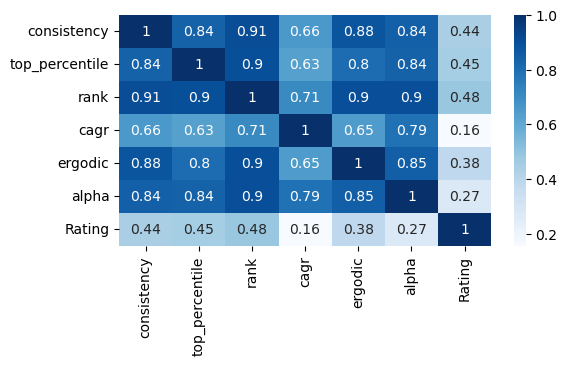

In [80]:
plt.figure(figsize=(6,3))
sns.heatmap(all_metrics.corr(), annot=True, cmap='Blues')

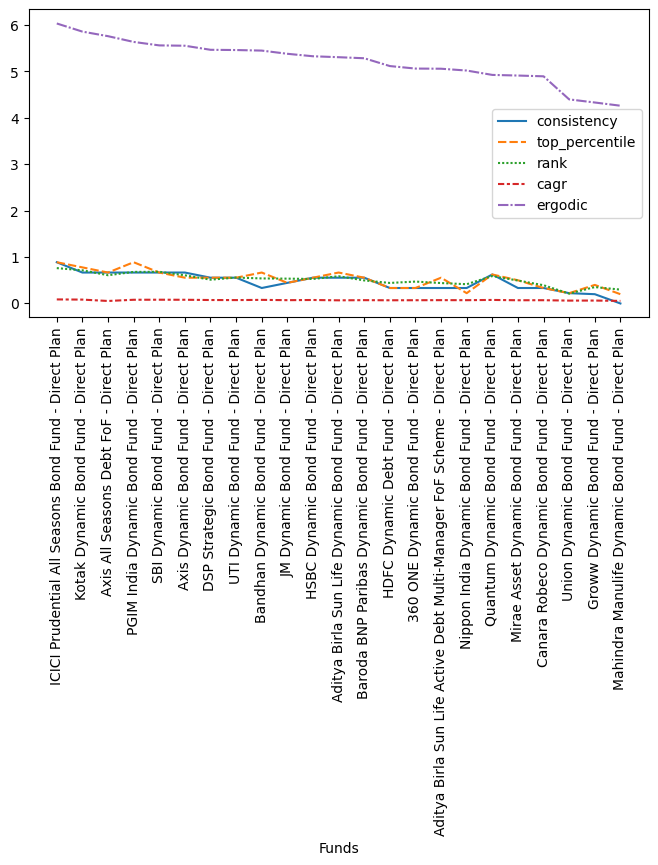

In [81]:
plt.figure(figsize=(8,4))
sns.lineplot(data=all_metrics.iloc[:, :5], sort=False)
# plt.xticks(np.arange(len(all_metrics)), [])
plt.xticks(rotation=90)
plt.show()

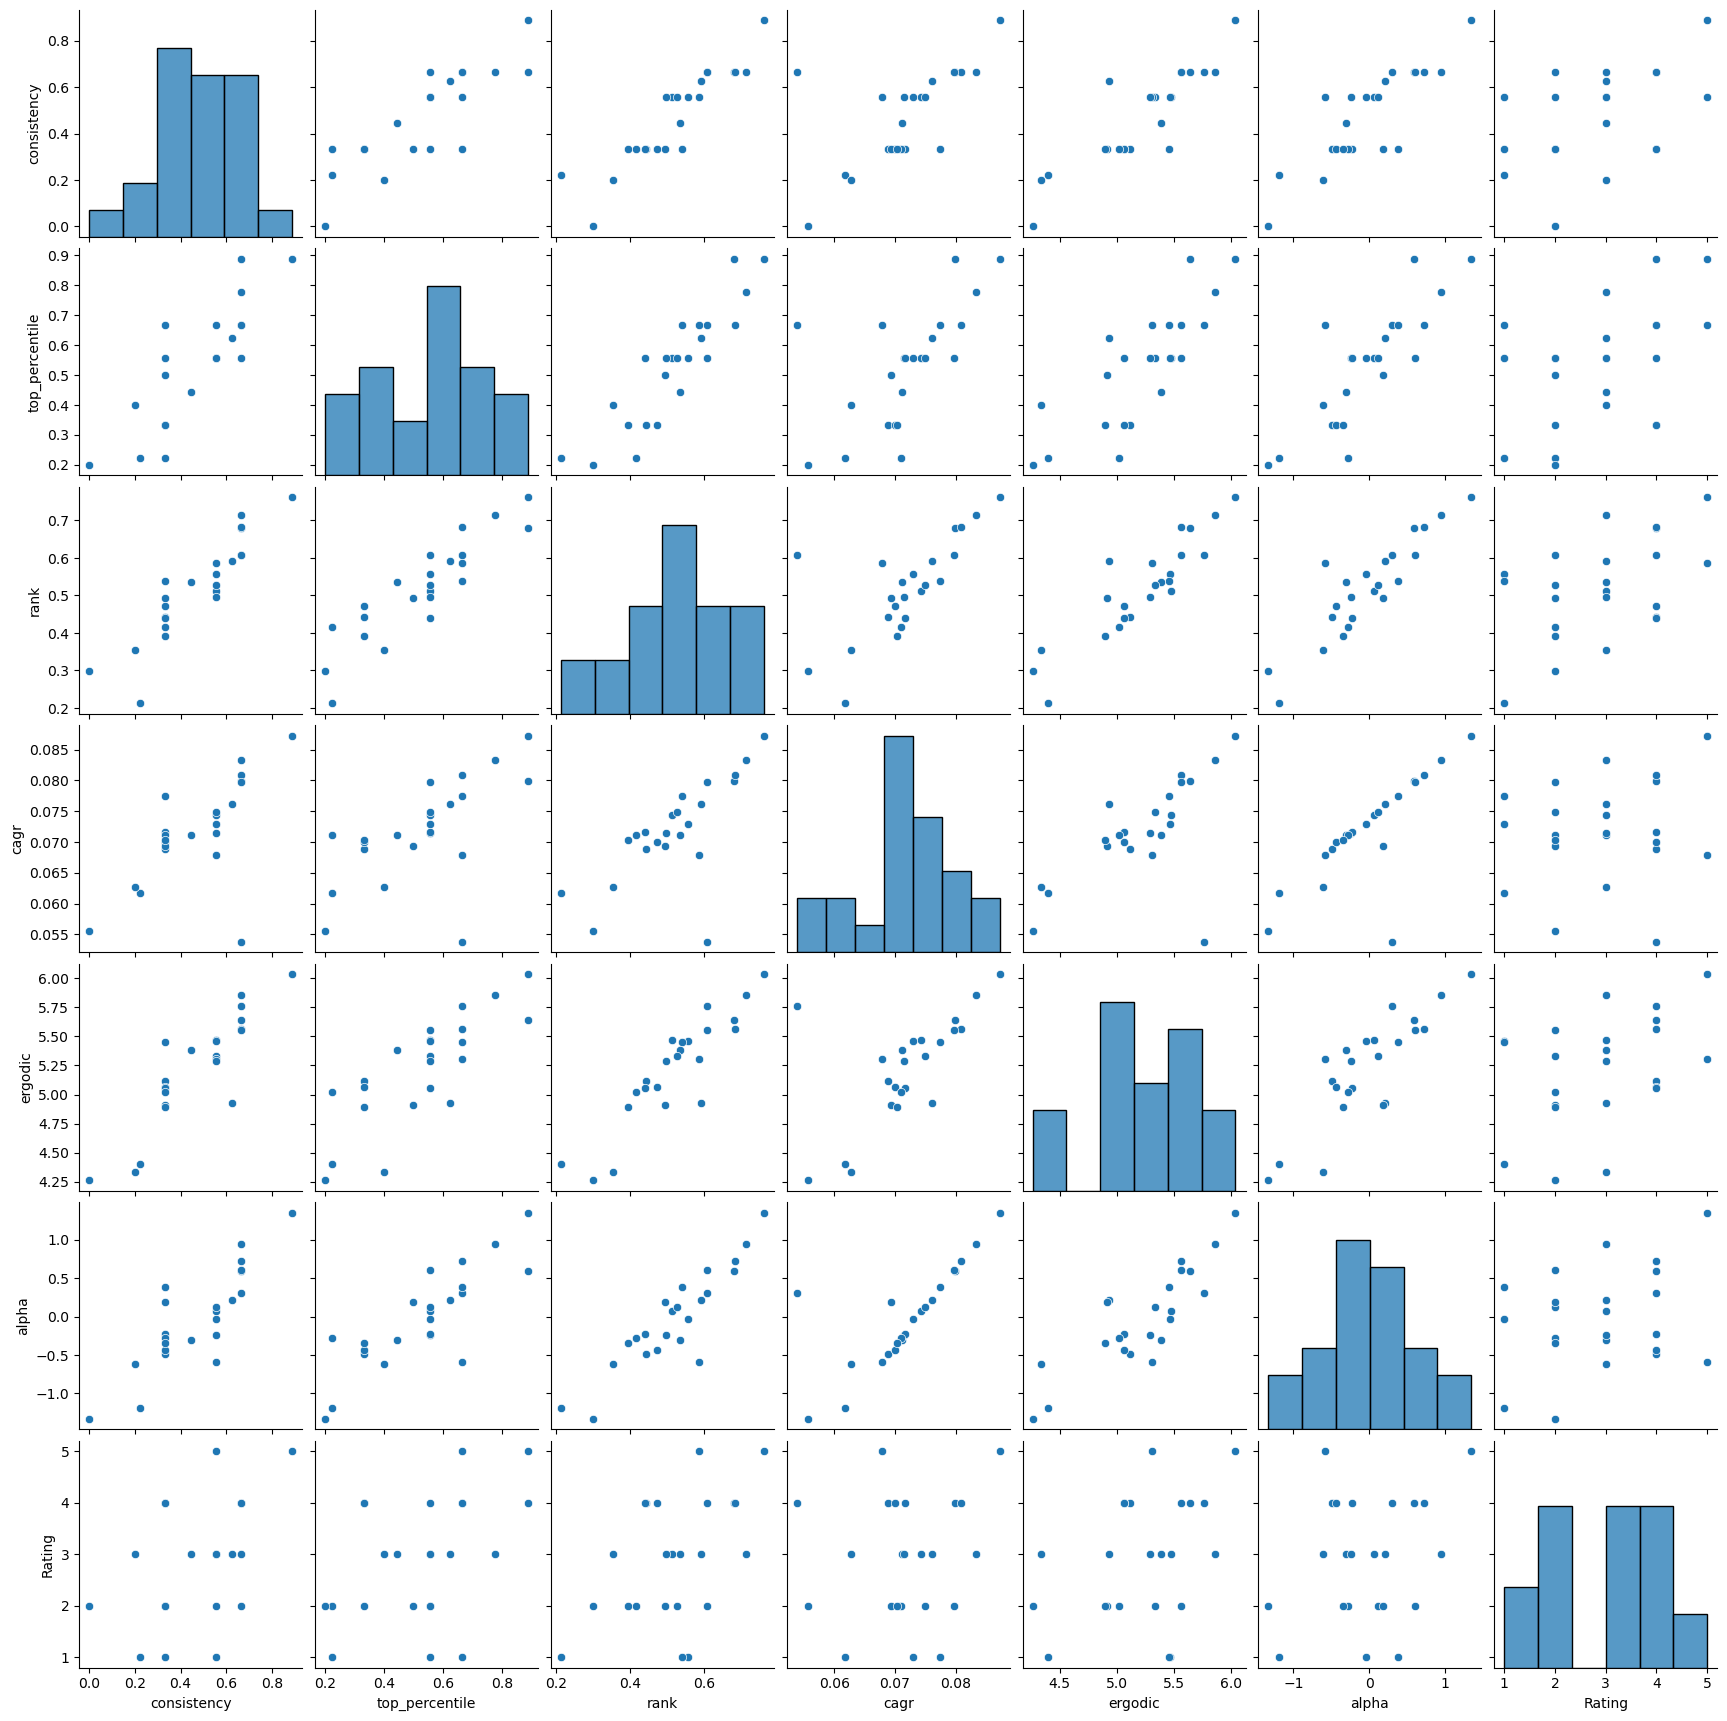

In [82]:
sns.pairplot(all_metrics)

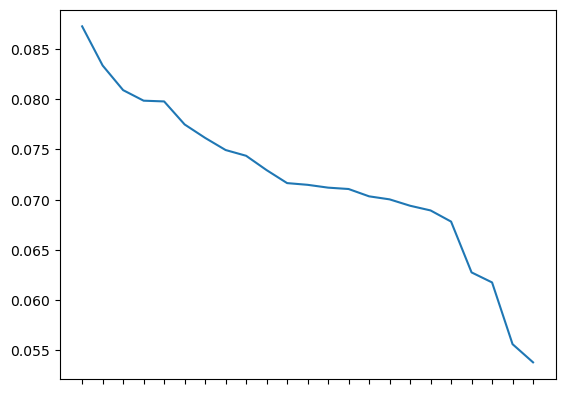

In [83]:
# dfdm.sum(axis=1).sort_values(ascending=False).plot()
plt.plot(cagr.sort_values(ascending=False))
plt.xticks(np.arange(len(dfdm)), [])
plt.show()

In [85]:
high = [2007,2009,2010,2012,2014,2017,2019,2020,2021,2023]
low = [2008,2011,2013,2015,2016,2018,2022]
s1 = dfdr.loc[:, high[-4:]].mean(axis=1).rename('high')
s2 = dfdr.loc[:, low[-3:]].mean(axis=1).rename('low')
hl = pd.concat([s1, s2], axis=1)
hl['diff'] = hl['high'] - hl['low']
hl.sort_values('diff', ascending=False)

,high,low,diff
Funds,,,
DSP Strategic Bond Fund - Direct Plan,72.974308,34.481312,38.492996
Union Dynamic Bond Fund - Direct Plan,36.166008,10.045767,26.120241
Bandhan Dynamic Bond Fund - Direct Plan,64.476285,41.758200,22.718085
Mahindra Manulife Dynamic Bond Fund - Direct Plan,34.090909,13.043478,21.047431
Axis Dynamic Bond Fund - Direct Plan,68.231225,47.643021,20.588205
Kotak Dynamic Bond Fund - Direct Plan,75.247036,54.713959,20.533077
Mirae Asset Dynamic Bond Fund - Direct Plan,54.990119,38.369565,16.620553
HDFC Dynamic Debt Fund - Direct Plan,55.928854,40.125858,15.802996
Nippon India Dynamic Bond Fund - Direct Plan,51.284585,36.441648,14.842937


A colorful plot to end.

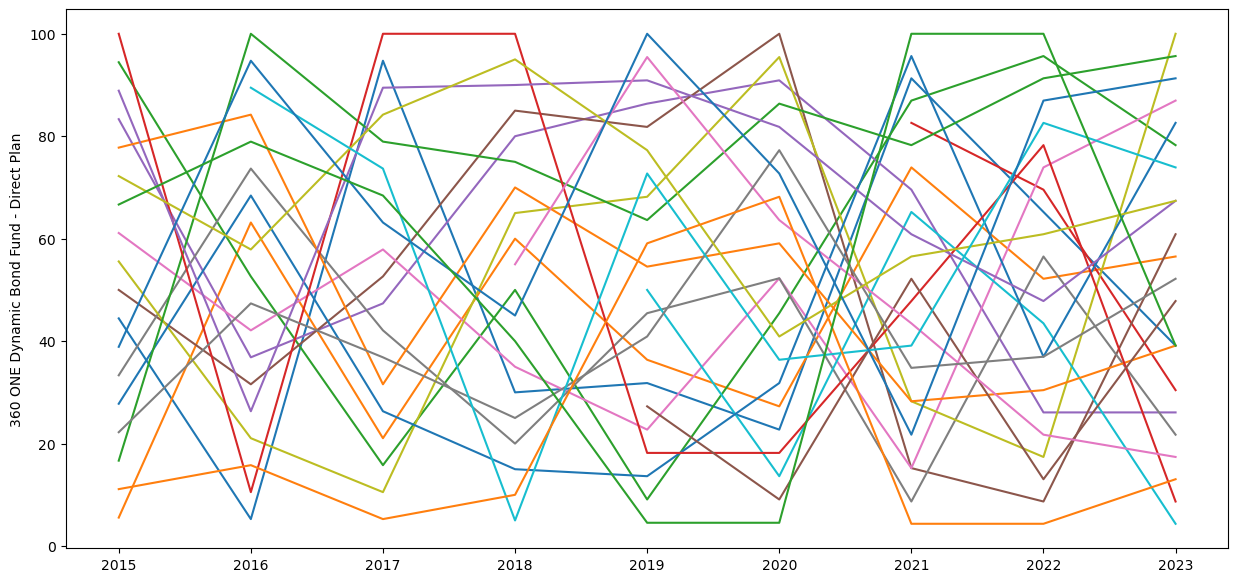

In [86]:
plt.figure(figsize=(15,7), dpi=100)
for index, row in dfdr.iloc[:, :-1].iterrows():
    sns.lineplot(data=row)